In [1]:
# SIMPLE CNN EXAMPLE

In [54]:
from keras import datasets, layers, Sequential
from matplotlib import pyplot as plt
import random
import warnings
import tensorflow as tf
import numpy as np
import seaborn as sn

In [3]:
warnings.filterwarnings('ignore')

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train = y_train.reshape(-1)

In [28]:
y_train.shape

(50000,)

In [29]:
y_test = y_test.reshape(-1)

In [30]:
y_test.shape

(10000,)

In [10]:
def showImg(index):
    plt.axis('off')
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(X_train[index])
    plt.title(classes[y_train[index]])

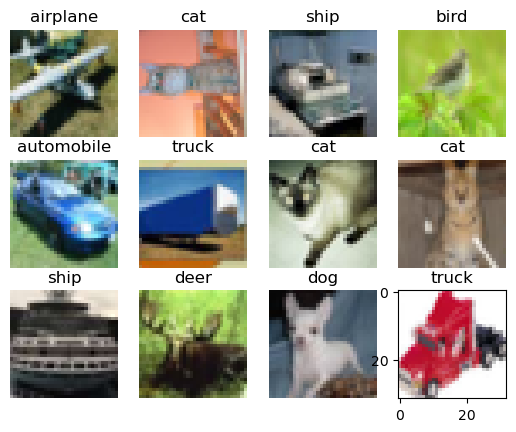

In [11]:
for i in range(12):
    showImg(random.randint(0, 50000))

In [12]:
X_train = X_train / 255
X_test = X_test / 255

# WITH SIMPLE ARTIFICIAL NEURAL NETWORK

In [13]:
ann = Sequential([
    layers.Flatten(input_shape=(32,32,3,)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 141s 90ms/step - loss: 1.8859 - accuracy: 0.3295
Epoch 2/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.6545 - accuracy: 0.4054
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.5846 - accuracy: 0.4312
Epoch 4/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.5415 - accuracy: 0.4476
Epoch 5/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.5010 - accuracy: 0.4614


In [17]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5385 - accuracy: 0.4437


[1.5384619235992432, 0.44369998574256897]

# WITH SIMPLE CONVOLUTIONAL NEURAL NETWORK

In [79]:
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3,)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3,)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.4487 - accuracy: 0.4799
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1284 - accuracy: 0.6026
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9915 - accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9009 - accuracy: 0.6859
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8276 - accuracy: 0.7113
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7660 - accuracy: 0.7335
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7093 - accuracy: 0.7536
Epoch 8/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6631 - accuracy: 0.7678
Epoch 9/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6181 - accuracy: 0.7851
Epoch 10/10
1563/1563 [==============================] - 15s 9ms/step

In [80]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9726 - accuracy: 0.6868


[0.9725694060325623, 0.6868000030517578]

In [81]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [70]:
def predict(index):
    print("Y PREDICTION = ", classes[np.argmax(y_pred[index])])
    print("Y TRUE = ", classes[y_test[index]])
    print()

In [88]:
for i in range(5):
    predict(random.randint(0, 10))

Y PREDICTION =  ship
Y TRUE =  ship

Y PREDICTION =  ship
Y TRUE =  ship

Y PREDICTION =  airplane
Y TRUE =  airplane

Y PREDICTION =  truck
Y TRUE =  automobile

Y PREDICTION =  cat
Y TRUE =  cat



In [89]:
y_pred = [np.argmax(val) for val in y_pred]

In [90]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[650,  22,  48,  30,  15,  12,  12,   7, 149,  55],
       [ 26, 797,   9,  10,   1,   8,  13,   3,  49,  84],
       [ 59,   6, 564,  84,  62,  78,  74,  30,  30,  13],
       [ 14,  16,  63, 511,  45, 204,  78,  33,  19,  17],
       [ 27,   8, 117,  84, 552,  44,  83,  62,  15,   8],
       [ 14,   8,  56, 162,  28, 636,  31,  47,   8,  10],
       [  4,   1,  51,  46,  20,  29, 827,   7,  10,   5],
       [ 16,   7,  42,  54,  59,  83,  18, 690,   5,  26],
       [ 35,  21,  14,  18,   2,   9,   3,   8, 860,  30],
       [ 14,  96,   9,  26,   1,  14,  11,   7,  41, 781]])>

Text(50.722222222222214, 0.5, 'Truth')

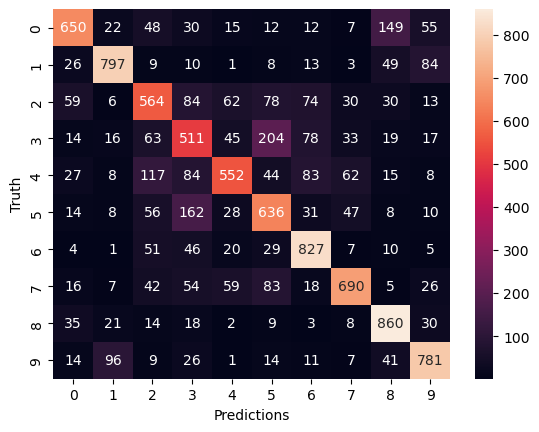

In [91]:
sn.heatmap(cm, annot=True, fmt='')
plt.xlabel("Predictions")
plt.ylabel("Truth")